<a href="https://colab.research.google.com/github/psgrigoletti/margem-liquida-colab/blob/main/Comparando_setores_IBOV_e_IFIX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kora
!pip install -U plotly
!pip install -U kaleido
!pip install -q condacolab # necessário para salvar como imagem

     |████████████████████████████████| 57 kB 515 kB/s 
     |████████████████████████████████| 59 kB 4.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 58 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 119 kB/s 


In [11]:
import requests
import condacolab # necessário para salvar como imagem

import pandas as pd
import numpy as np
import plotly.express as px

from kora.selenium import wd
from google.colab.data_table import DataTable
from time import sleep
from selenium.webdriver.common.by import By
from IPython.display import Image

condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
def busca_carteira_teorica(indice, espera=8):
  url = f'https://sistemaswebb3-listados.b3.com.br/indexPage/day/{indice.upper()}?language=pt-br'
  wd.get(url)
  wd.find_element(By.ID, 'segment').send_keys("Setor de Atuação")
  sleep(espera)

  wd.find_element(By.LINK_TEXT, "Download").click()
  sleep(espera)

  arquivos = !ls -1t *.csv
  return pd.read_csv(arquivos[0], sep=';', encoding='ISO-8859-1', skipfooter=2, engine="python", thousands='.', decimal=',', header=1, index_col=False)

# IBOV

In [3]:
ibov = busca_carteira_teorica('ibov', 3)

In [4]:
ibov

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.
0,Bens Indls / Máqs e Equips,WEGE3,WEG,ON NM,1484859030,1.892,1.892
1,Bens Indls / Mat Transporte,EMBR3,EMBRAER,ON NM,734588205,0.453,0.453
2,Bens Indls/Transporte,AZUL4,AZUL,PN N2,327741172,0.334,2.298
3,Bens Indls/Transporte,CCRO3,CCR SA,ON NM,1115693556,0.713,2.298
4,Bens Indls/Transporte,ECOR3,ECORODOVIAS,ON NM,339237914,0.118,2.298
...,...,...,...,...,...,...,...
87,Utilidade Públ / Energ Elétrica,ENGI11,ENERGISA,UNT N2,248477689,0.528,6.919
88,Utilidade Públ / Energ Elétrica,ENEV3,ENEVA,ON NM,1257479978,0.959,6.919
89,Utilidade Públ / Energ Elétrica,EGIE3,ENGIE BRASIL,ON NM,255217329,0.542,6.919
90,Utilidade Públ / Energ Elétrica,EQTL3,EQUATORIAL,ON NM,1100513485,1.269,6.919


In [5]:
ibov["Subsetor"] = ibov['Setor'].apply(lambda s: s[s.rfind("/")+1:].strip())
ibov['Setor'] = ibov['Setor'].apply(lambda s: s[:s.rfind("/")].strip())
ibov

,Setor,Código,Ação,Tipo,Qtde. Teórica,Part. (%),Part. (%)Acum.,Subsetor
0,Bens Indls,WEGE3,WEG,ON NM,1484859030,1.892,1.892,Máqs e Equips
1,Bens Indls,EMBR3,EMBRAER,ON NM,734588205,0.453,0.453,Mat Transporte
2,Bens Indls,AZUL4,AZUL,PN N2,327741172,0.334,2.298,Transporte
3,Bens Indls,CCRO3,CCR SA,ON NM,1115693556,0.713,2.298,Transporte
4,Bens Indls,ECOR3,ECORODOVIAS,ON NM,339237914,0.118,2.298,Transporte
...,...,...,...,...,...,...,...,...
87,Utilidade Públ,ENGI11,ENERGISA,UNT N2,248477689,0.528,6.919,Energ Elétrica
88,Utilidade Públ,ENEV3,ENEVA,ON NM,1257479978,0.959,6.919,Energ Elétrica
89,Utilidade Públ,EGIE3,ENGIE BRASIL,ON NM,255217329,0.542,6.919,Energ Elétrica
90,Utilidade Públ,EQTL3,EQUATORIAL,ON NM,1100513485,1.269,6.919,Energ Elétrica


In [6]:
ibov["Setor"].unique()

array(['Bens Indls', 'Comput e Equip', 'Cons N  Básico', 'Cons N Cíclico',
       'Cons N Ciclico', 'Consumo Cíclico', 'Diverso', 'Financ e Outros',
       'Financeiro e Outros', 'Mats Básicos', 'Petróleo', 'Saúde',
       'Tec.Informação', 'Telecomunicaçã', 'Utilidade Públ'], dtype=object)

In [7]:
def conserta_setores(setor):
  if setor == 'Cons N  Básico' or setor == 'Cons N Ciclico': return 'Consumo Não-Cíclico'
  if setor == 'Financ e Outros' or setor == 'Financeiro e Outros': return 'Financeiro'
  else: return setor

In [8]:
ibov['Setor'] = ibov['Setor'].apply(conserta_setores) 

In [9]:
ibov["Setor"].unique()

array(['Bens Indls', 'Comput e Equip', 'Consumo Não-Cíclico',
       'Cons N Cíclico', 'Consumo Cíclico', 'Diverso', 'Financeiro',
       'Mats Básicos', 'Petróleo', 'Saúde', 'Tec.Informação',
       'Telecomunicaçã', 'Utilidade Públ'], dtype=object)

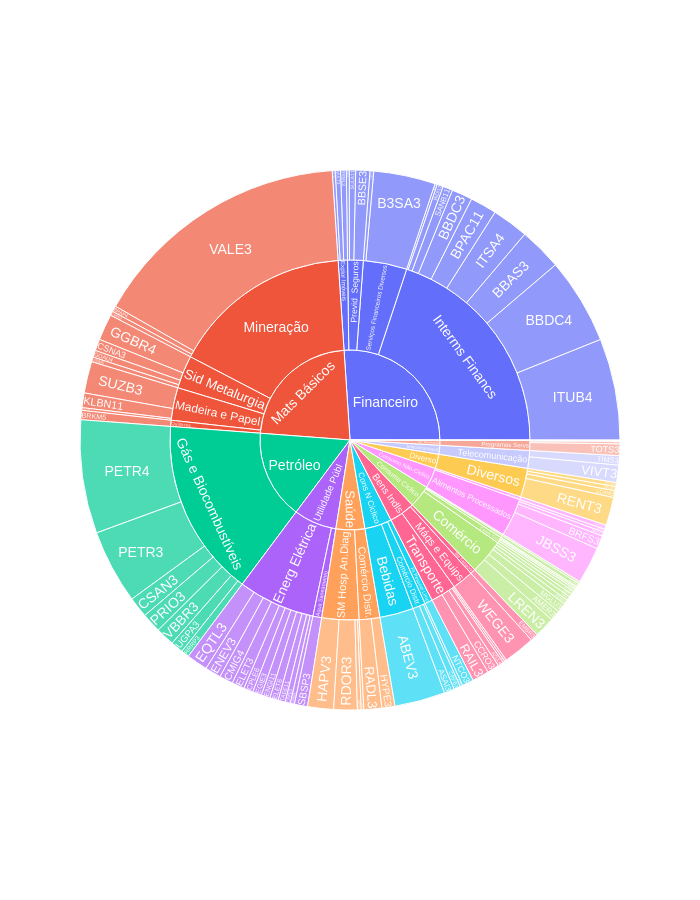

In [12]:
fig = px.sunburst(data_frame=ibov, path=['Setor', 'Subsetor', 'Código'], values='Part. (%)', height=900)
fig.update_traces(textfont_color='white', textfont_size=14, hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()
fig.write_image("./ibov-sunburst.png")
Image('./ibov-sunburst.png')

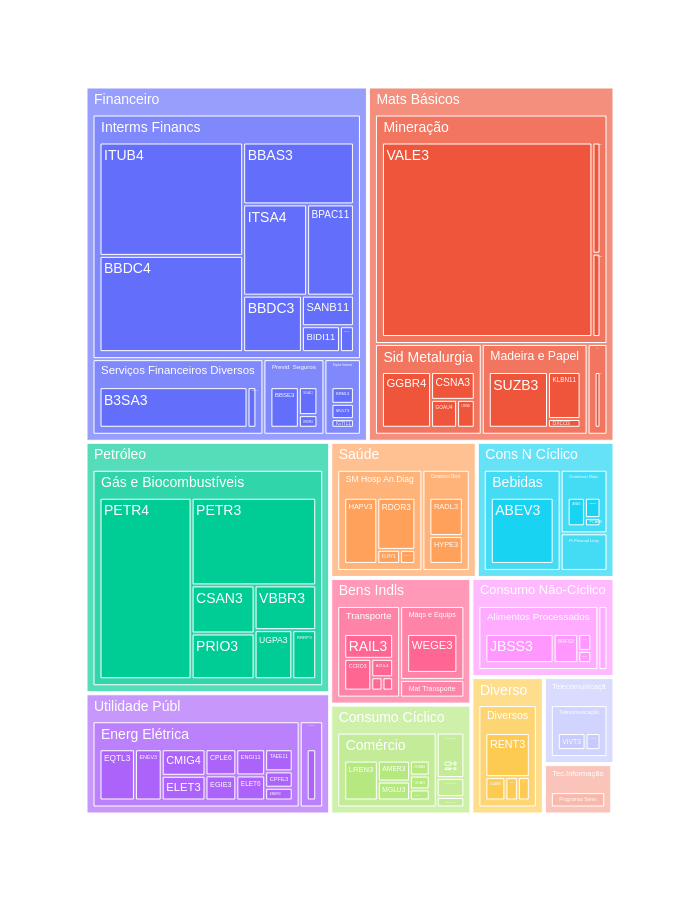

In [13]:
fig = px.treemap(data_frame=ibov, path=['Setor', 'Subsetor', 'Código'], values='Part. (%)', height=900)
fig.update_traces(textfont_color='white', textfont_size=14, hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()
fig.write_image("./ibov-treemap.png")
Image('./ibov-treemap.png')

# IFIX

In [14]:
ifix = busca_carteira_teorica('ifix', 3)
ifix.drop(columns=['Setor', 'Tipo', 'Part. (%)Acum.'], inplace=True)
ifix

,Código,Ação,Qtde. Teórica,Part. (%)
0,BPFF11,FII ABSOLUTO,4492326,0.271
1,AFHI11,FII AFHI CRI,2513286,0.241
2,ALZR11,FII ALIANZA,5922011,0.631
3,ARCT11,FII ARCTIUM,4375573,0.425
4,ARRI11,FII ATRIO,1699435,0.149
...,...,...,...,...
101,XPIN11,FII XP INDL,7150402,0.508
102,XPLG11,FII XP LOG,27101061,2.361
103,XPML11,FII XP MALLS,18681577,1.673
104,XPPR11,FII XP PROP,7316171,0.365


In [15]:
url = 'https://www.fundsexplorer.com.br/ranking'
headers = {
    'User-Agent': 
        'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4) AppleWebKit/537.36'
        ' (KHTML, like Gecko) Chrome/51.0.2704.103 Safari/537.36'
}

response = requests.get(url, headers=headers)
if response.status_code == 200:
    fiis_fundsexplorer = pd.read_html(response.content, encoding='utf-8')[0]

In [16]:
fiis_fundsexplorer.rename(columns={"Códigodo fundo": "Código"}, inplace=True)

In [17]:
ifix


,Código,Ação,Qtde. Teórica,Part. (%)
0,BPFF11,FII ABSOLUTO,4492326,0.271
1,AFHI11,FII AFHI CRI,2513286,0.241
2,ALZR11,FII ALIANZA,5922011,0.631
3,ARCT11,FII ARCTIUM,4375573,0.425
4,ARRI11,FII ATRIO,1699435,0.149
...,...,...,...,...
101,XPIN11,FII XP INDL,7150402,0.508
102,XPLG11,FII XP LOG,27101061,2.361
103,XPML11,FII XP MALLS,18681577,1.673
104,XPPR11,FII XP PROP,7316171,0.365


In [18]:
ifix_final = pd.merge(ifix, fiis_fundsexplorer, how="left", on="Código")

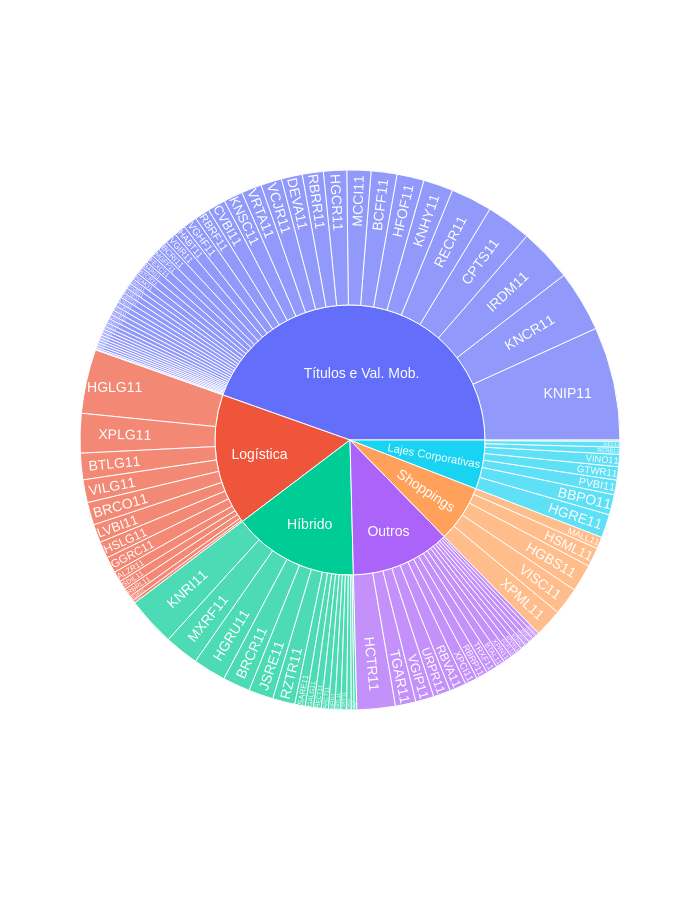

In [19]:
fig = px.sunburst(data_frame=ifix_final, path=['Setor', 'Código'], values='Part. (%)', height=900)
fig.update_traces(textfont_color='white', textfont_size=14, hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()
fig.write_image("./ifix-sunburst.png")
Image('./ifix-sunburst.png')

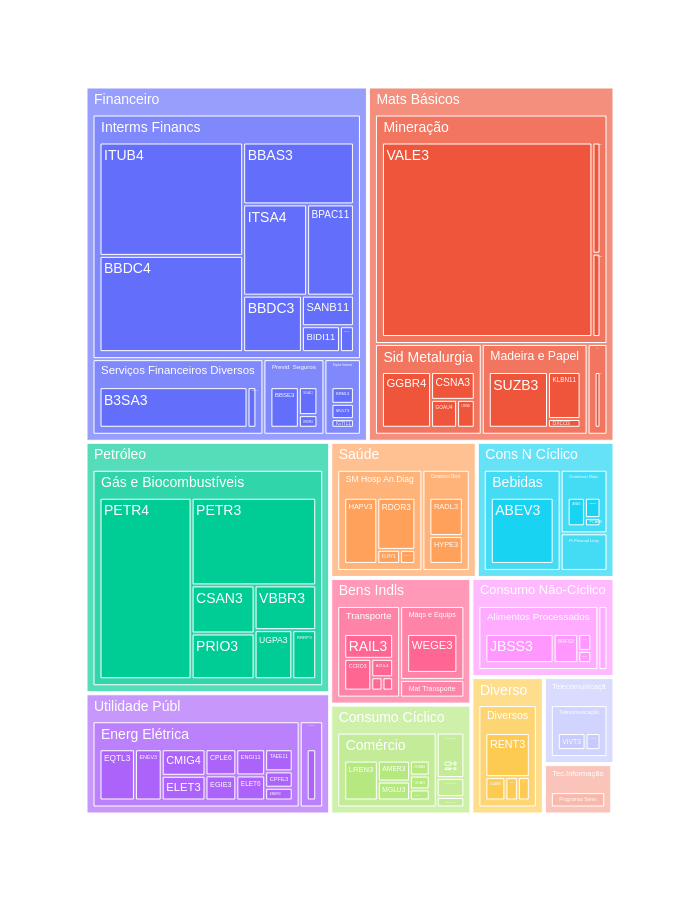

In [20]:
fig = px.treemap(data_frame=ifix_final, path=['Setor', 'Código'], values='Part. (%)', height=900)
fig.update_traces(textfont_color='white', textfont_size=14, hovertemplate='<b>%{label}:</b> %{value:.2f}%')
fig.show()
fig.write_image("./ifix-treemap.png")
Image('./ibov-treemap.png')